<a href="https://colab.research.google.com/github/Appaji-Yadla/Appaji-Yadla/blob/main/Loan_Prediction_(Banking_Domain).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


##SPRINT 1 - Data Preparation and Model Building

---



**Problem Statement -** Given various features about a customer like Age, Income, Loan Amount, Loan Intent, Home Ownership etc.. , predict if in case the loan is given, will the customer default or not on the Loan payments.

Task - Prepare the data and build a model to predict if a customer is going to default or not.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_cr = pd.read_csv("/content/drive/MyDrive/Data Science_Innomatics/Projects/credit_risk_dataset.csv")
df_cr.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df_cr.shape

(32581, 12)

In [ ]:
df_cr.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
df_cr.describe(include='all')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [ ]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df_cr.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
df_cr.dropna(inplace=True)

In [ ]:
df_cr.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
df_cr.nunique()

person_age                      57
person_income                 3835
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      728
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [ ]:
df_cr.duplicated().sum()

137

In [ ]:
df_cr.drop_duplicates(inplace=True)

In [ ]:
df_cr.duplicated().sum()

0

In [ ]:
df_cr['loan_grade'].value_counts()

A    9345
B    9094
C    5682
D    3243
E     869
F     209
G      59
Name: loan_grade, dtype: int64

In [ ]:
df_cr['loan_status'].value_counts()

0    22313
1     6188
Name: loan_status, dtype: int64

In [ ]:
df_cr.corr()

<ipython-input-17-a92cf96a4712>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cr.corr()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.178987,0.165624,0.054246,0.010170,-0.024091,-0.040782,0.859621
person_income,0.178987,1.000000,0.136427,0.264942,-0.001346,-0.140456,-0.251487,0.116622
person_emp_length,0.165624,0.136427,1.000000,0.110934,-0.056607,-0.082852,-0.055033,0.146486
loan_amnt,0.054246,0.264942,0.110934,1.000000,0.146026,0.114153,0.577708,0.045334
loan_int_rate,0.010170,-0.001346,-0.056607,0.146026,1.000000,0.339995,0.123441,0.014562
loan_status,-0.024091,-0.140456,-0.082852,0.114153,0.339995,1.000000,0.380000,-0.016559
loan_percent_income,-0.040782,-0.251487,-0.055033,0.577708,0.123441,0.380000,1.000000,-0.029690
cb_person_cred_hist_length,0.859621,0.116622,0.146486,0.045334,0.014562,-0.016559,-0.029690,1.000000


<ipython-input-18-a963cefb8692>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cr.corr(), annot=True, linewidths =8, center =0,ax=ax, cmap="coolwarm")


<Axes: >

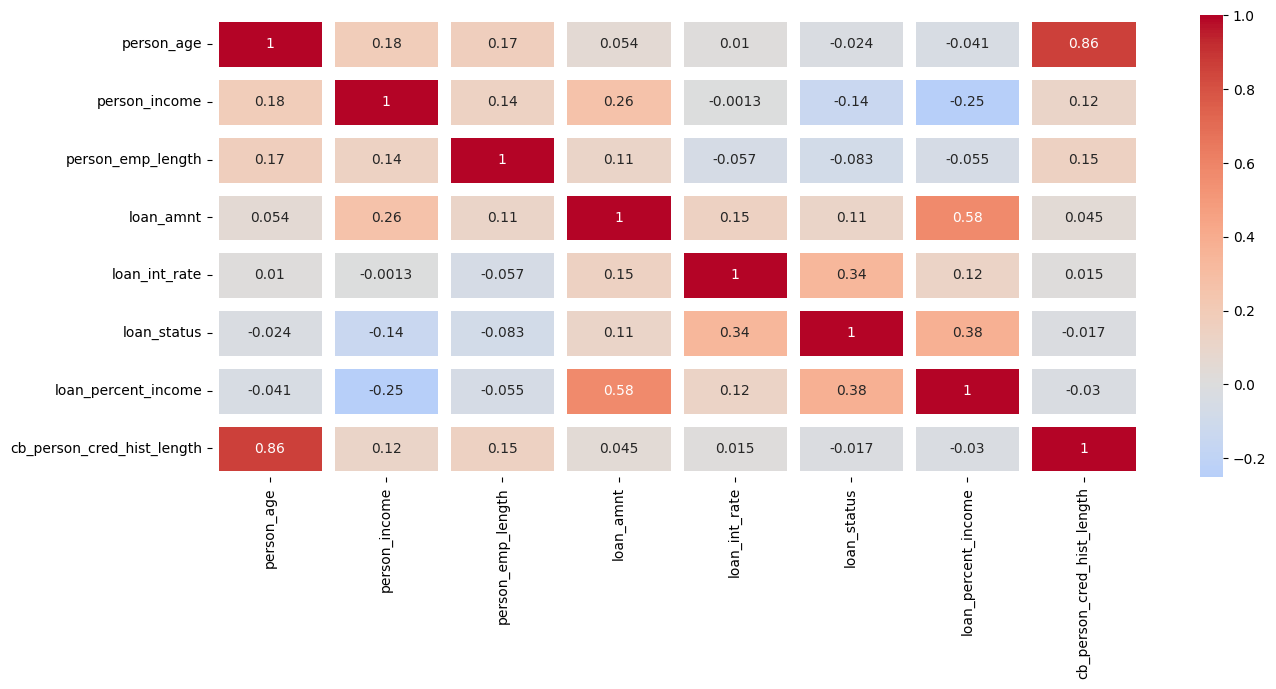

In [ ]:
#Check correlation
f, ax = plt.subplots(figsize=(15,6))
sns.heatmap(df_cr.corr(), annot=True, linewidths =8, center =0,ax=ax, cmap="coolwarm")

In [ ]:
# Separate Input and Output Variable
X = df_cr.drop('loan_status', axis = 1)
Y = df_cr['loan_status']

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify = Y, random_state = 42)

In [ ]:
#Data preparation on train data
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_scaler = StandardScaler()

X_train_num = pd.DataFrame(numerical_scaler.fit_transform(X_train[numerical_cols]),columns=numerical_cols,index = X_train.index)
X_test_num = pd.DataFrame(numerical_scaler.transform(X_test[numerical_cols]),columns=numerical_cols,index = X_test.index)


In [ ]:
# Instantiate OneHotEncoder
OH_encoder = OneHotEncoder(drop='first', sparse=False)

# Drop 'loan_grade' from categorical_cols
categorical_cols_no_grade = categorical_cols.drop('loan_grade')

# Fit and transform on the training data
X_train_OH = pd.DataFrame(OH_encoder.fit_transform(X_train[categorical_cols_no_grade]),
                           columns=OH_encoder.get_feature_names_out(categorical_cols_no_grade),
                           index=X_train.index)

# Transform on the test data (using the same encoder)
X_test_OH = pd.DataFrame(OH_encoder.transform(X_test[categorical_cols_no_grade]),
                          columns=OH_encoder.get_feature_names_out(categorical_cols_no_grade),
                          index=X_test.index)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train_OH.shape, X_train.shape

((21375, 9), (21375, 11))

In [ ]:
X_train_LE = X_train["loan_grade"].replace(["G","F","E","D","C","B","A"],[7,6,5,4,3,2,1])
X_test_LE = X_test["loan_grade"].replace(["G","F","E","D","C","B","A"],[7,6,5,4,3,2,1])

In [ ]:
df_cr['loan_grade'].value_counts()

A    9345
B    9094
C    5682
D    3243
E     869
F     209
G      59
Name: loan_grade, dtype: int64

In [ ]:
# Concatenate the transformed features

X_train_concatenated = pd.concat([X_train_num, X_train_OH, X_train_LE], axis=1)
X_test_concatenated = pd.concat([X_test_num, X_test_OH, X_test_LE], axis=1)


In [ ]:
X_train_concatenated.shape, X_test_concatenated.shape, X_train.shape, X_test.shape

((21375, 17), (7126, 17), (21375, 11), (7126, 11))

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(21375, 11) (21375,)
(7126, 11) (7126,)


**Model Building**

Logistic Regression

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train_concatenated, Y_train)

# Predictions
Y_test_predected_LR = LR_classifier.predict(X_test_concatenated)

# Accuracy
Log_Acc=metrics.accuracy_score(Y_test, Y_test_predected_LR)
Log_Acc

0.8485826550659556

K-NN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train_concatenated, Y_train)

# Predictions
Y_test_predected_KNN = KNN_classifier.predict(X_test_concatenated)

# Accuracy
KNN_Acc = metrics.accuracy_score(Y_test, Y_test_predected_KNN)
KNN_Acc

0.8861914117316868

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train_concatenated, Y_train)

# Predictions
Y_test_predected_DT = DT_classifier.predict(X_test_concatenated)

# Accuracy
DT_Acc = metrics.accuracy_score(Y_test, Y_test_predected_DT)
DT_Acc

0.8874543923659837

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train_concatenated, Y_train)

# Predictions
Y_test_predected_RF = RF_classifier.predict(X_test_concatenated)

# Accuracy
RF_Acc = metrics.accuracy_score(Y_test, Y_test_predected_RF)
RF_Acc

0.9301150715689026

SVM Classifier

In [ ]:
from sklearn.svm import SVC

# Modelling SVM Classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_concatenated, Y_train)

# Predictions
Y_test_predected_svm = svm_model.predict(X_test_concatenated)

# Accuracy
SVM_acc = metrics.accuracy_score(Y_test, Y_test_predected_svm)
SVM_acc

0.8504069604266068

In [ ]:
Evaluation = pd.DataFrame({"Algorithms":["Logistic Regression","KNN","Decision Tree","Random Forest","SVM"], "accuracy_score":[Log_Acc, KNN_Acc, DT_Acc, RF_Acc, SVM_acc]})
Evaluation

,Algorithms,accuracy_score
0,Logistic Regression,0.848583
1,KNN,0.886191
2,Decision Tree,0.887454
3,Random Forest,0.930115
4,SVM,0.850407


#Conclusion on the best algorithm

Based on accuracy scores, the Random Forest algorithm outperforms others for Credit Risk Scoring, achieving 93.01%. Decision Tree follows closely with 88.75%, and KNN demonstrates competitive performance at 88.62%. These findings highlight the robustness and effectiveness of ensemble methods in capturing complex credit risk patterns.

#SPRINT 2 - Exploratory Data Analysis

In [ ]:
df_cr.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df_cr.shape

(28501, 12)

In [ ]:
df_cr.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28501.000000,2.850100e+04,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000
mean,27.738676,6.665441e+04,4.790148,9658.533034,11.045385,0.217115,0.169517,5.800498
std,6.316166,6.237603e+04,4.157462,6329.604672,3.230748,0.412289,0.106410,4.042153
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.950000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28501 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28501 non-null  int64  
 1   person_income               28501 non-null  int64  
 2   person_home_ownership       28501 non-null  object 
 3   person_emp_length           28501 non-null  float64
 4   loan_intent                 28501 non-null  object 
 5   loan_grade                  28501 non-null  object 
 6   loan_amnt                   28501 non-null  int64  
 7   loan_int_rate               28501 non-null  float64
 8   loan_status                 28501 non-null  int64  
 9   loan_percent_income         28501 non-null  float64
 10  cb_person_default_on_file   28501 non-null  object 
 11  cb_person_cred_hist_length  28501 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [ ]:
df_cr.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
df_cr['loan_status'].value_counts()

0    22313
1     6188
Name: loan_status, dtype: int64

In [ ]:
df_cr.duplicated().sum()

0

In [ ]:
df_cr.corr()

<ipython-input-42-a92cf96a4712>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cr.corr()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.178987,0.165624,0.054246,0.010170,-0.024091,-0.040782,0.859621
person_income,0.178987,1.000000,0.136427,0.264942,-0.001346,-0.140456,-0.251487,0.116622
person_emp_length,0.165624,0.136427,1.000000,0.110934,-0.056607,-0.082852,-0.055033,0.146486
loan_amnt,0.054246,0.264942,0.110934,1.000000,0.146026,0.114153,0.577708,0.045334
loan_int_rate,0.010170,-0.001346,-0.056607,0.146026,1.000000,0.339995,0.123441,0.014562
loan_status,-0.024091,-0.140456,-0.082852,0.114153,0.339995,1.000000,0.380000,-0.016559
loan_percent_income,-0.040782,-0.251487,-0.055033,0.577708,0.123441,0.380000,1.000000,-0.029690
cb_person_cred_hist_length,0.859621,0.116622,0.146486,0.045334,0.014562,-0.016559,-0.029690,1.000000


<ipython-input-43-a963cefb8692>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cr.corr(), annot=True, linewidths =8, center =0,ax=ax, cmap="coolwarm")


<Axes: >

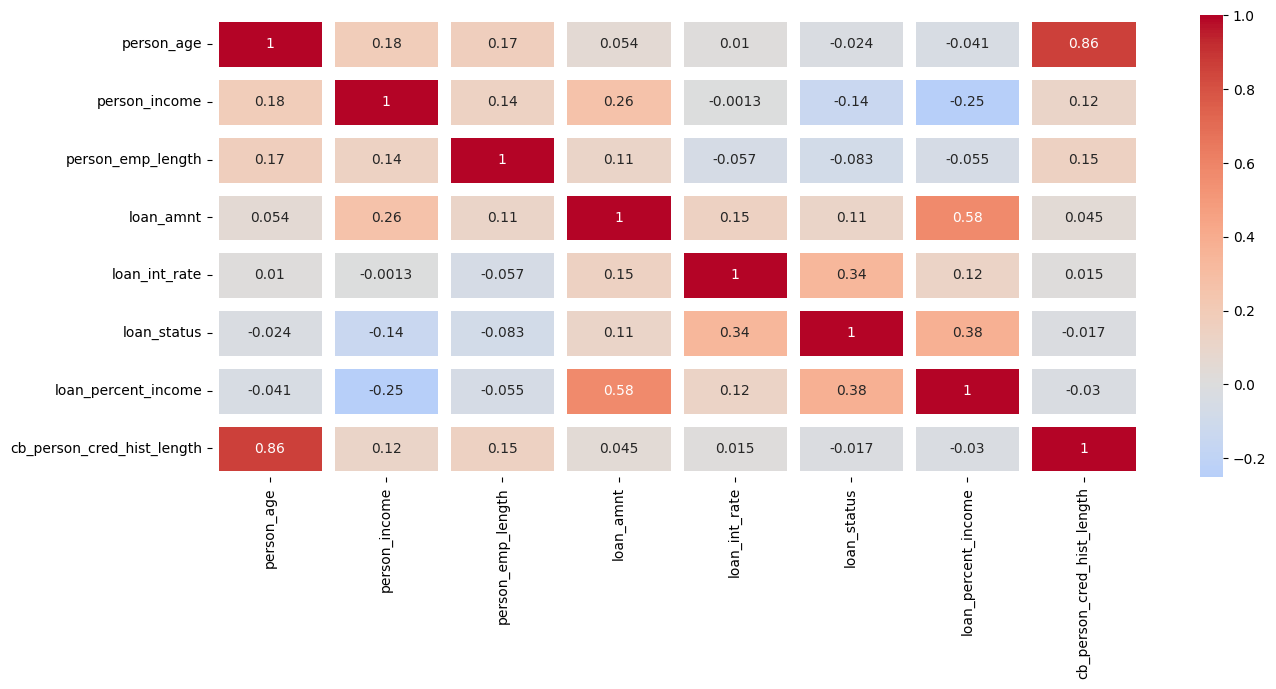

In [ ]:
f, ax = plt.subplots(figsize=(15,6))
sns.heatmap(df_cr.corr(), annot=True, linewidths =8, center =0,ax=ax, cmap="coolwarm")

The highest correlation was observed for 'person age' and 'cb_person_cred_hist_length' - 0.86

The correlation between most variables is very low, making each variable prominent for the “input” category of model building.

<ipython-input-44-fe6295fc9a37>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cr_encoded.corr(), annot=True, linewidths=0.8, center=0, cmap="coolwarm", ax=ax)


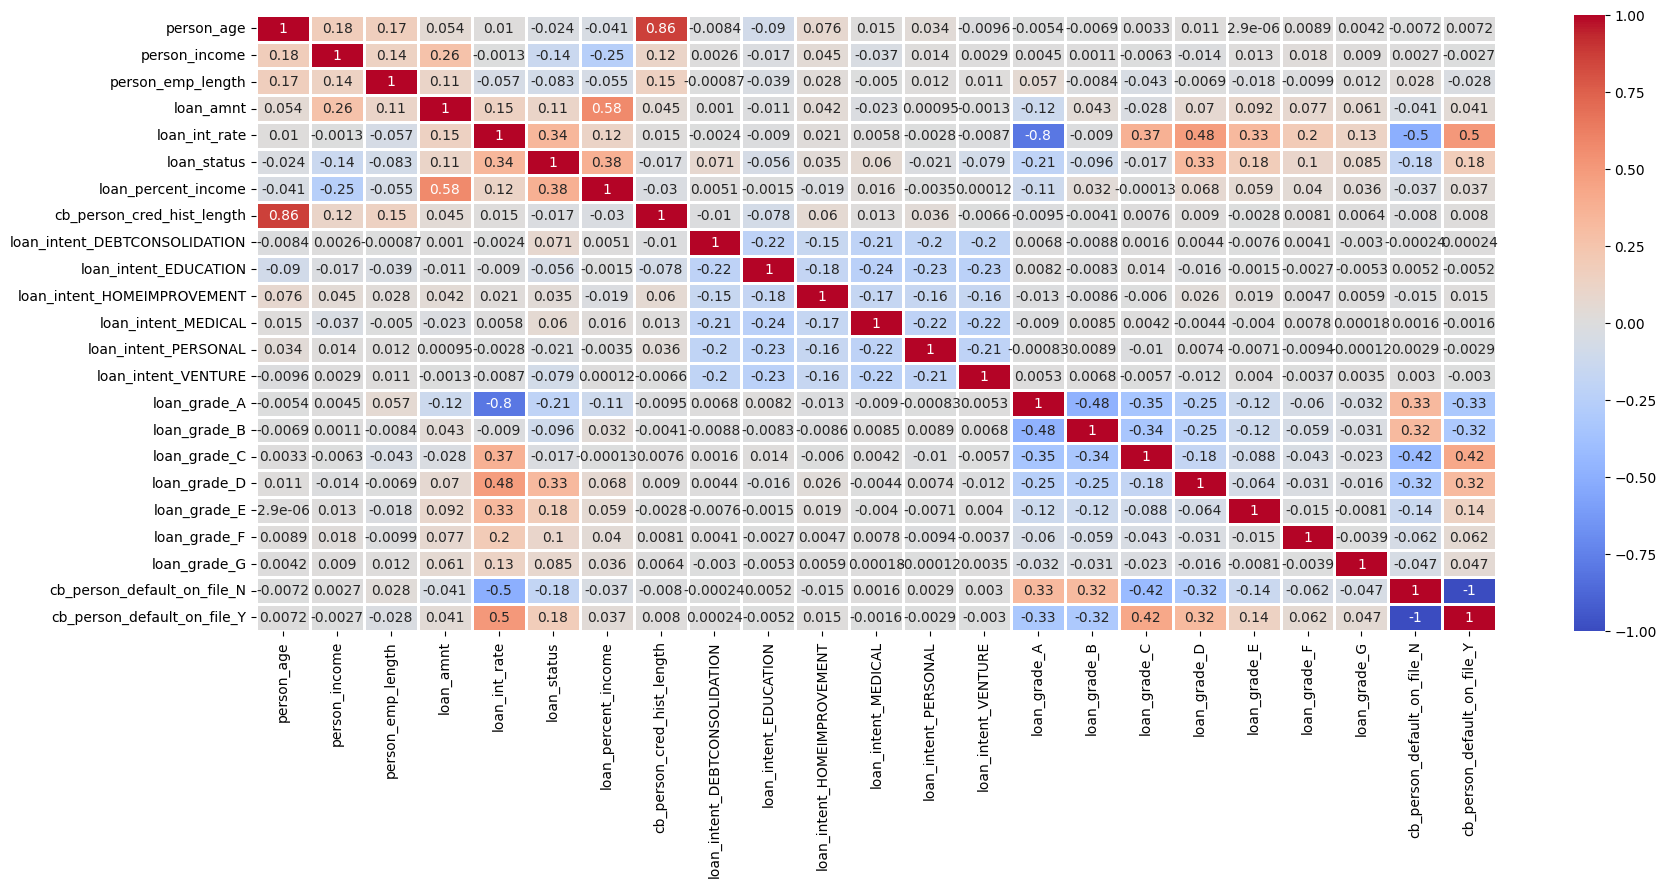

In [ ]:
# Convert categorical columns to numerical representations
df_cr_encoded = pd.get_dummies(df_cr, columns=['loan_intent', 'loan_grade', 'cb_person_default_on_file'])

# Create the heatmap
fig, ax = plt.subplots(figsize=(20, 8))  # Adjust the figure size as needed
sns.heatmap(df_cr_encoded.corr(), annot=True, linewidths=0.8, center=0, cmap="coolwarm", ax=ax)
plt.show()

In [ ]:
df_cr['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [ ]:
df_cr.person_home_ownership.value_counts().values

array([14498, 11736,  2174,    93])

In [ ]:
df_cr.person_home_ownership.value_counts()

RENT        14498
MORTGAGE    11736
OWN          2174
OTHER          93
Name: person_home_ownership, dtype: int64

In [ ]:
df_cr['person_home_ownership'].value_counts().index

Index(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype='object')

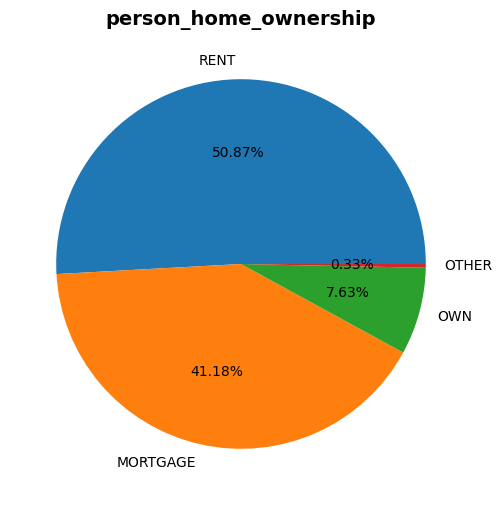

In [ ]:
plt.figure(figsize=(8,6))       # Create a figure and set its size
labels=df_cr['person_home_ownership'].value_counts().index      # Data for the pie chart
# Plot the pie chart with the specified settings
plt.pie(df_cr.person_home_ownership.value_counts().values, labels=labels, autopct='%.2f%%')
plt.title('person_home_ownership', fontsize=14, fontweight='bold')   # Add a title
plt.show()   # Display the pie chart

Observation: Most of the People taking loan does not have own house

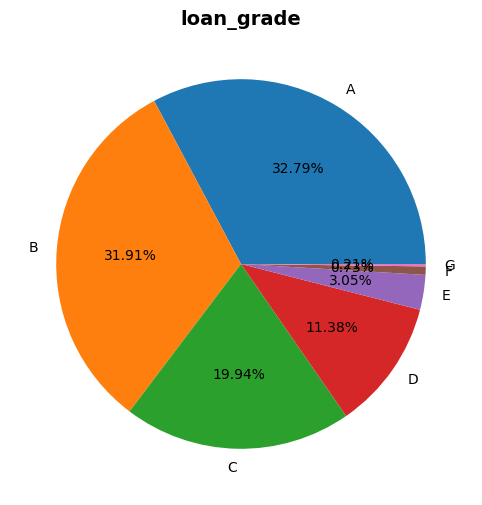

In [ ]:
plt.figure(figsize=(8,6))       # Create a figure and set its size
labels=df_cr['loan_grade'].value_counts().index      # Data for the pie chart
# Plot the pie chart with the specified settings
plt.pie(df_cr.loan_grade.value_counts().values, labels=labels, autopct='%.2f%%')
plt.title('loan_grade', fontsize=14, fontweight='bold')   # Add a title
plt.show()   # Display the pie chart

Observations: Loan grade A and B accounted for 64.7% of the total.

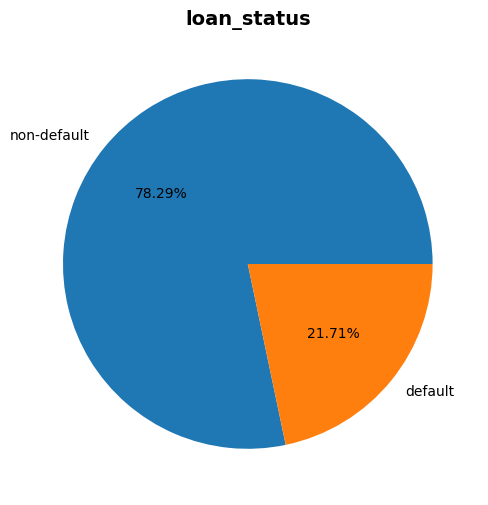

In [ ]:
plt.figure(figsize=(8,6))       # Create a figure and set its size
labels=df_cr['loan_status'].replace({0: 'non-default', 1: 'default'}).value_counts().index      # Data for the pie chart
# Plot the pie chart with the specified settings
plt.pie(df_cr.loan_status.value_counts().values, labels=labels, autopct='%.2f%%')
plt.title('loan_status', fontsize=14, fontweight='bold')   # Add a title
plt.show()   # Display the pie chart

Observations: Approximately 78% of individuals stick to their financial commitments without default, while the remaining 22% experience defaults in their payment obligations.

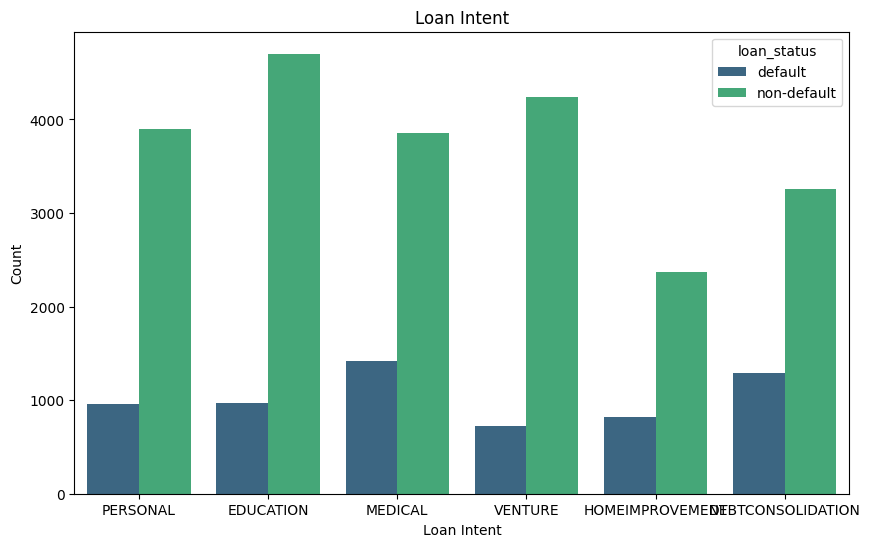

In [ ]:
plt.figure(figsize=(10, 6))
hue=df_cr['loan_status'].replace({0: 'non-default', 1: 'default'})
sns.countplot(data=df_cr, x='loan_intent', hue=hue, palette='viridis')
plt.title('Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.show()

**Observations:**



1. "MEDICAL" and "DEBTCONSOLIDATION" loans have a higher default rate compared to other loan intents.
2. There is a higher demand for educational loans compared to other types of loans.
3. There are more non-defaulted loans than defaulted loans for all loan intents. This is a good sign, as it means that most people are able to repay their loans on time.

In [ ]:
df_cr['loan_intent'].value_counts()

EDUCATION            5670
MEDICAL              5269
VENTURE              4969
PERSONAL             4859
DEBTCONSOLIDATION    4547
HOMEIMPROVEMENT      3187
Name: loan_intent, dtype: int64

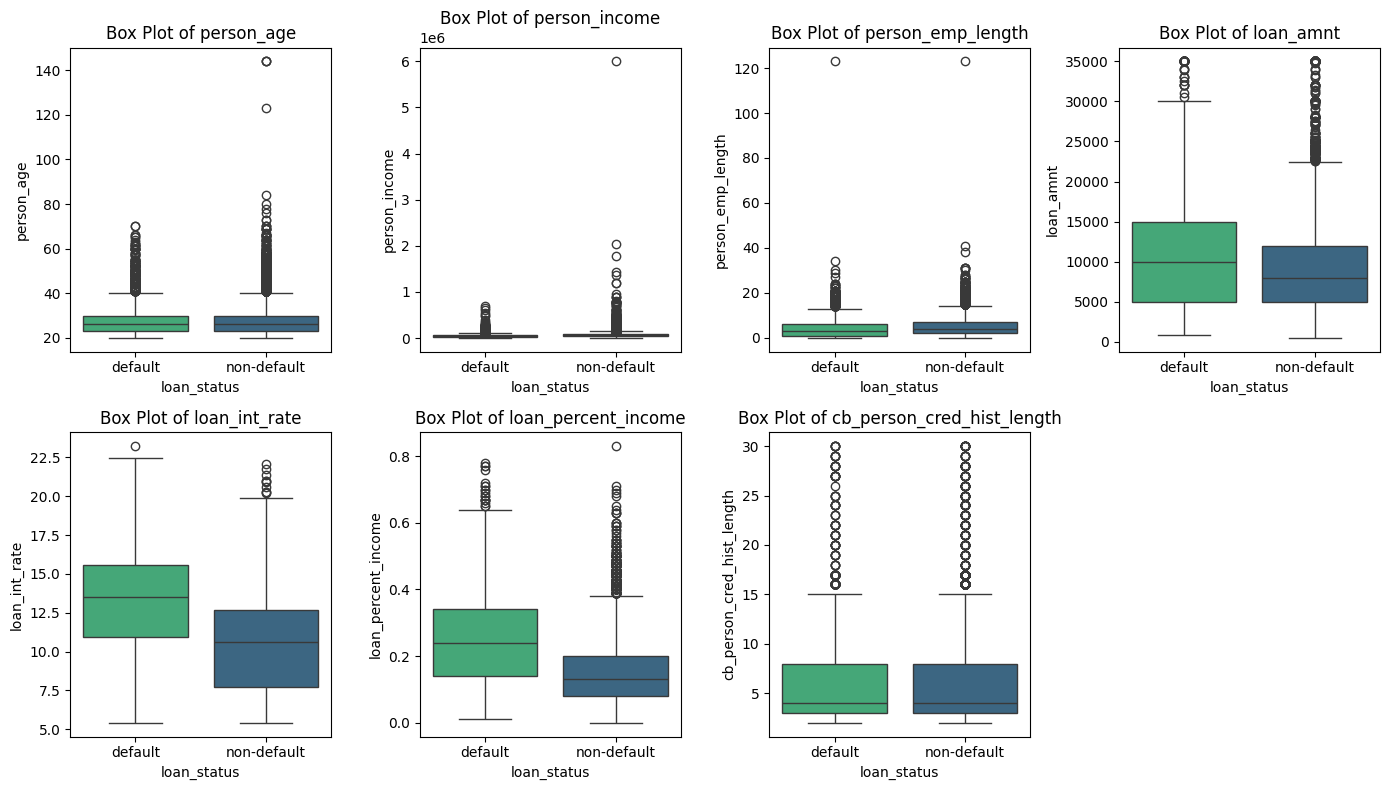

In [ ]:
plt.figure(figsize=(14, 8))
hue=df_cr['loan_status'].replace({0: 'non-default', 1: 'default'})
numeric_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=hue, y=feature, data=df_cr, hue='loan_status', palette='viridis', legend=False)
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

**Key Observations:**

**>** There is a wide range of ages in the data set. The youngest person is in their 20s, and the oldest person is in their 80s.

**>** There appears to be a larger proportion of loans with a lower amount compared to those with a higher amount. This suggests that there is greater variability in loan amounts on the lower end.

**>** Defaulters tend to have higher median and upper quartile loan amounts, indicating potential differences in the loan preferences or risk associated with larger loans for this group.

**>** There appears to be a larger proportion of loans with a lower interest rate in the "non-default" category compared to the "default" category. The box for "non-default" loans is wider and sits towards the lower end of the y-axis, indicating a greater spread and concentration of loans towards lower interest rates in that group.

**>** On average, tend to have higher median and upper quartile interest rates, indicating that a higher percentage of defaulters have higher interest rates. So, if someone is more likely to not pay back a loan, they might end up with a higher interest rate on that loan.

**>** on average, defaulters tend to allocate a larger proportion of their income to loan repayment, and there is greater variability in this percentage among defaulters.

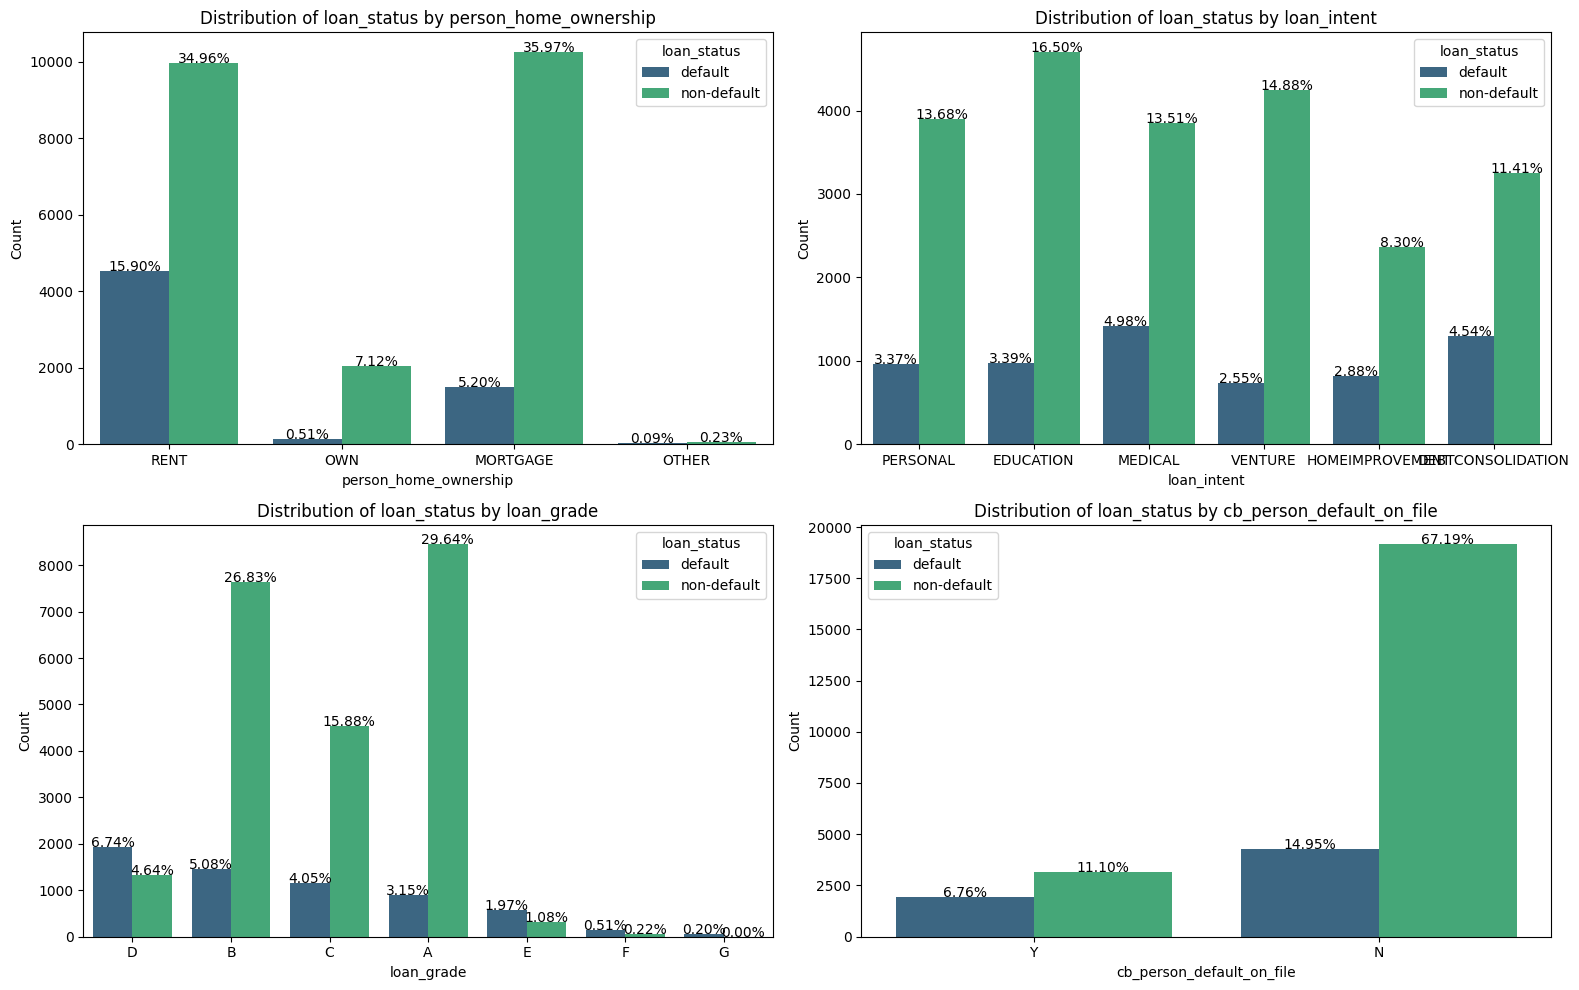

In [ ]:
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
hue = df_cr['loan_status'].replace({0: 'non-default', 1: 'default'})

plt.figure(figsize=(16, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(data=df_cr, x=feature, hue=hue, palette='viridis')

    total = float(len(df_cr))
    for p in ax.patches:
        height = p.get_height()
        if height != 0:  # Exclude zero counts
            ax.text(p.get_x() + p.get_width() / 2., height + 0.04, f'{height/total:.2%}', ha="center")

    plt.title(f'Distribution of loan_status by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Key Observations:**

**Distribution of loan_status by person_home_ownership:**

1. Renters exhibit a significantly higher default rate (15.90%) compared to homeowners and mortgage holders.
2. Homeowners (OWN) experience a remarkably lower default rate (0.51%) than renters.
3. Mortgage holders fall in between, with a moderate default rate of 5.20%.
4. Other home ownership categories have very low default rates (0.09%), though the sample size may be limited.
5. Despite the higher default rate, renters contribute significantly to the overall defaults, emphasizing the impact of home ownership on loan performance.

**Distribution of loan_status by loan_intent:**
1. Debt consolidation loans have the highest default rate (4.54%), suggesting increased risk for borrowers seeking to consolidate debts.
2. Medical and education loans also show elevated default rates (4.98% and 3.39%, respectively), indicating potential challenges in these loan categories.
3. Home improvement loans have a moderate default rate (2.88%), while venture and personal loans demonstrate relatively lower default rates (2.55% and 3.37%, respectively).
4. Despite higher default rates in certain categories, non-default rates for education loans (16.50%) suggest successful repayment by a substantial number of borrowers.

**Distribution of loan_status by loan_grade:**
1. Loan grade significantly influences default rates, with Grade D loans having the highest default rate at 6.74%.
2. Grades A and B exhibit moderate default rates (3.15% and 5.08%), suggesting a relatively lower risk for higher-grade loans.
3. Lower-grade loans (E, F, G) show lower default rates, with Grade G having the lowest at 0.20%, though sample sizes for these grades may be smaller.
4. The trend indicates that default rates generally decrease as loan grades improve, emphasizing the importance of loan grading in risk assessment.


**Distribution of loan_status by cb_person_default_on_file:**

1. Borrowers with no previous defaults (N) have a much higher non-default rate at 67.19%, indicating a significantly lower risk for this group.

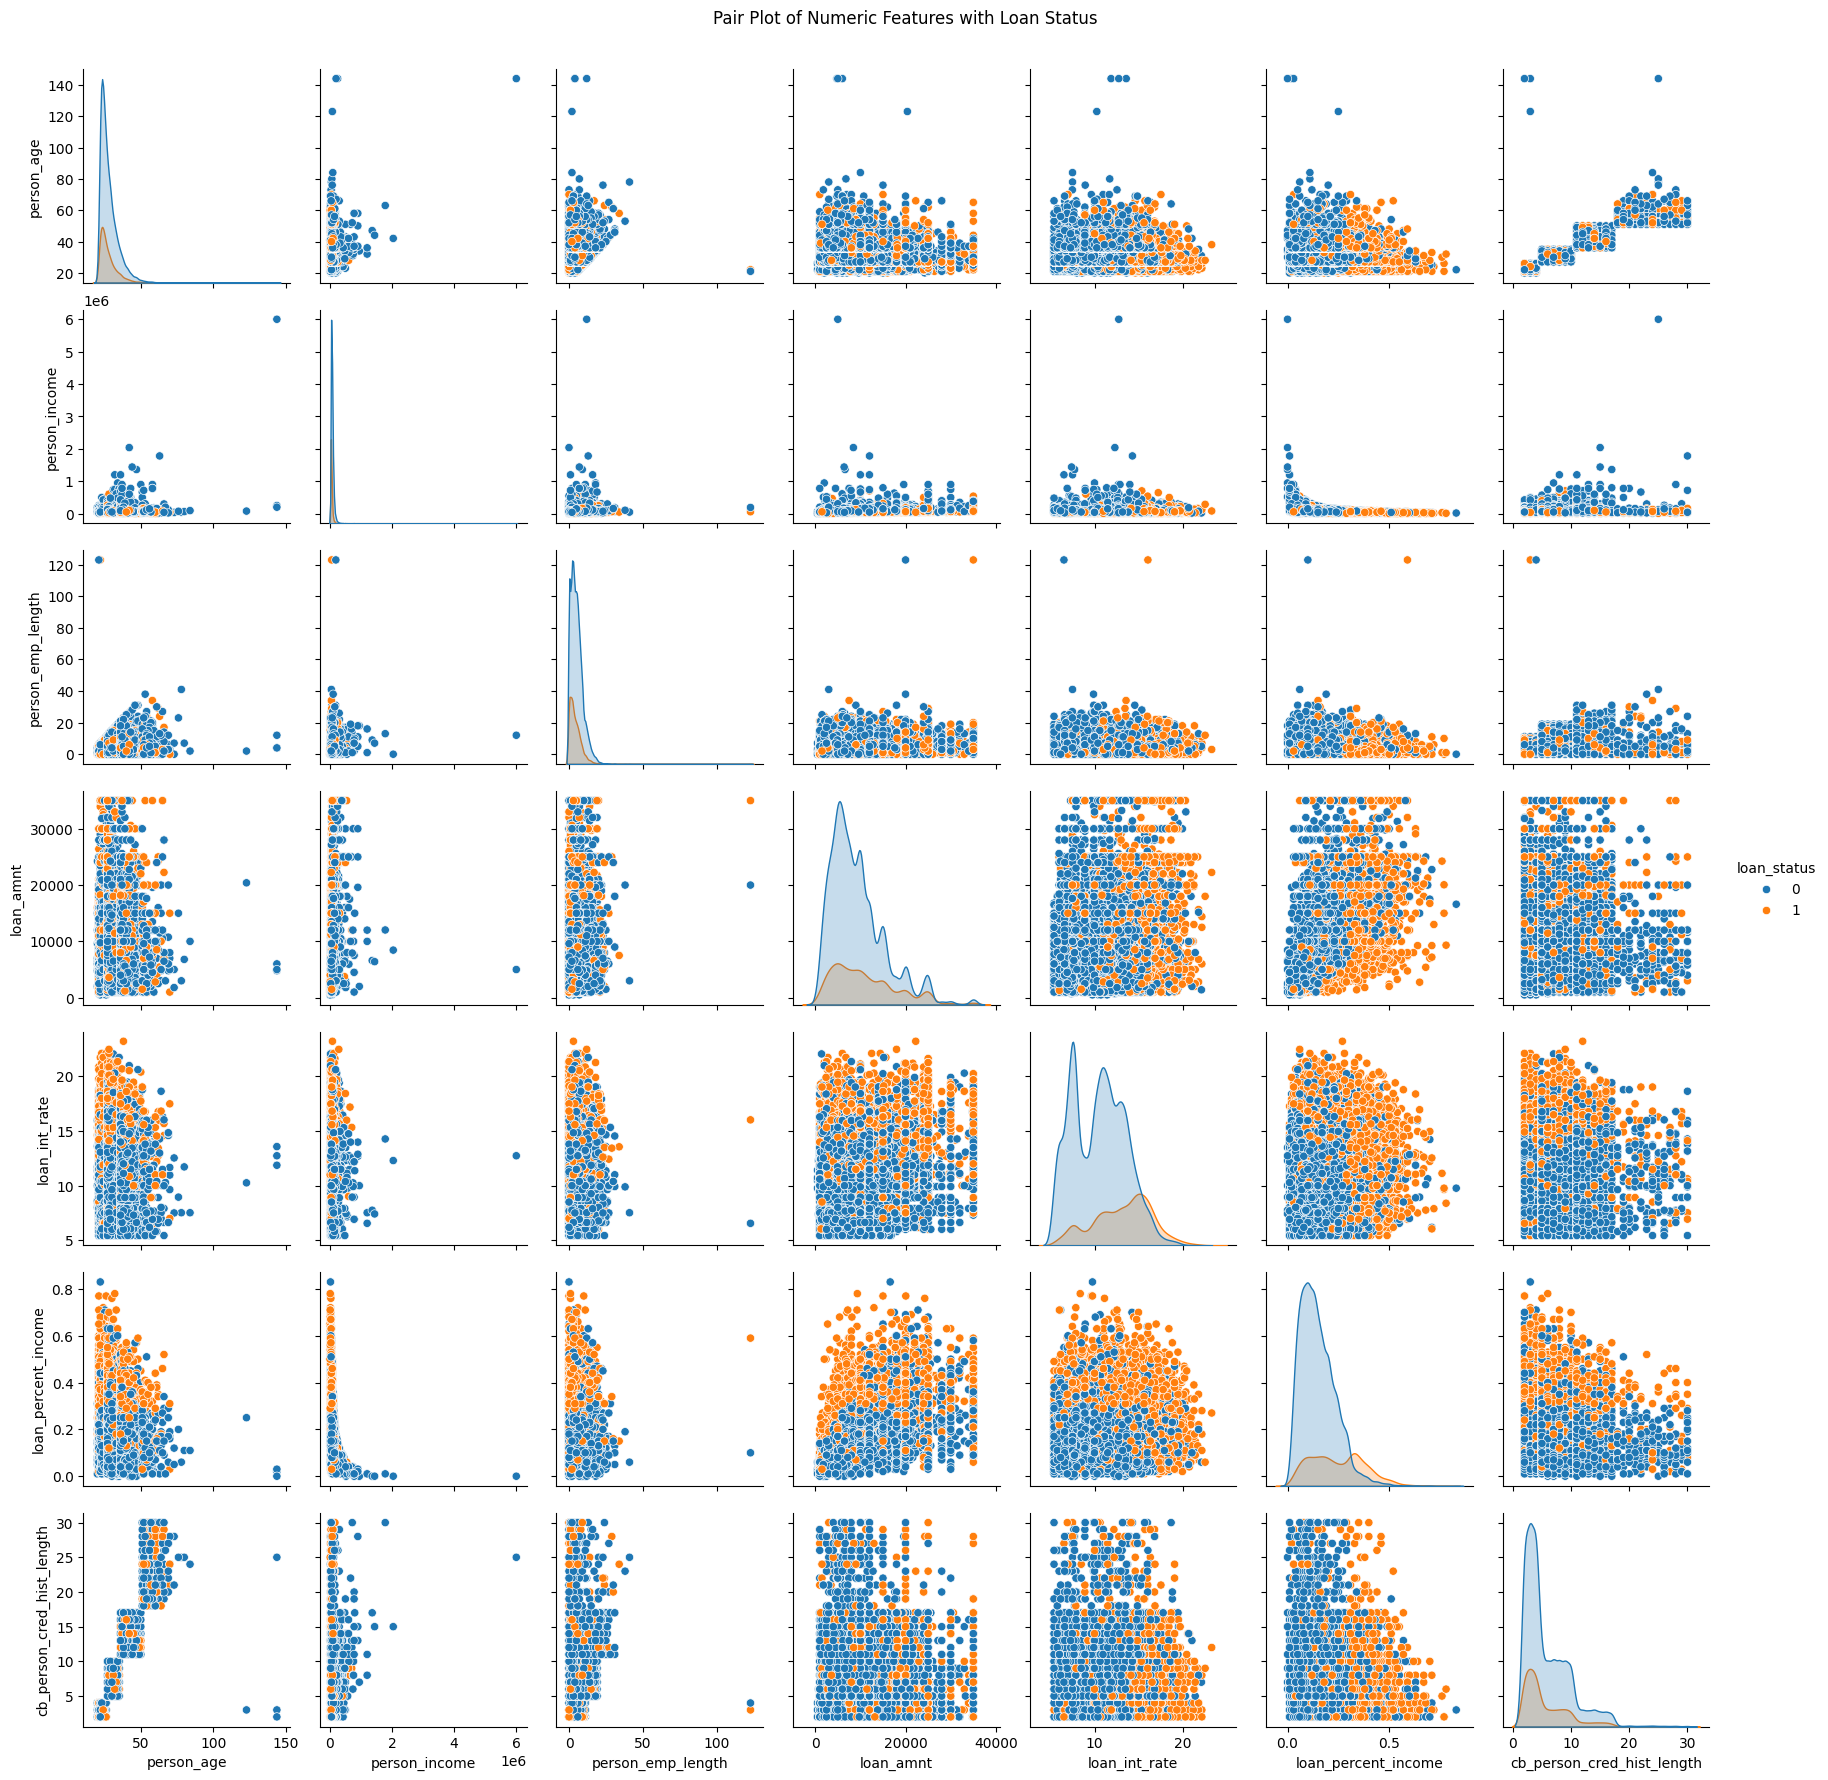

In [ ]:
sns.pairplot(df_cr, hue='loan_status')
plt.suptitle("Pair Plot of Numeric Features with Loan Status", y=1.02)
plt.show()

**Key Observations:**

**>** The Step function is observed for ‘person age’ and ' cb_person_cred_hist_length’. In the ranges of 50-70 for "person age" and 18-30 for "cb_person_cred_hist_length" indicate distinct age groups and credit history length categories, suggesting segmentation within these features.

**>** A decreasing curve between "loan_percent_income" and "person_income" suggests a potential negative correlation between these two variables. This pattern implies that, as "person_income" increases, the percentage of income dedicated to loan repayment ("loan_percent_income") tends to decrease.

# Conclusion: Exploratory Data Analysis (EDA)

The dataset displays a concentration of loans with smaller amounts, suggesting greater variability on the lower end.

Defaulters, on average, tend to secure larger loans, as indicated by higher median and upper quartile loan amounts. Additionally, defaulters allocate a larger percentage of their income to loan repayment, signifying potential financial stress.

Homeownership, loan intent, loan grade, and credit history status contribute to loan status variability. Notably, renters exhibit a higher likelihood of default, indicating a potential risk factor.

A negative correlation is observed between "loan_percent_income" and "person_income," signifying that higher incomes are associated with a lower percentage of income dedicated to loan repayment.

#Recommendations to the bank

Consider implementing risk-based interest rates by assessing individual borrower profiles. Tailoring interest rates based on creditworthiness and historical default patterns.

Leverage the observed age groups and credit history length categories to tailor marketing strategies.

Individuals with higher incomes may warrant more favorable loan conditions, potentially reducing default risks.

Identify borrowers with high loan-to-income ratios and provide targeted financial education or budgeting assistance.